## CNN - recognize cars from Rocket League 
In this jupyter notebook, we will recognize cars from Rocket League (1421 train photos and 182 test photos), by using convolutional neural network (CNN).

### Imports

In [ ]:
import glob
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

#the following are to do with this interactive notebook code
%matplotlib inline 
from matplotlib import pyplot as plt # this lets you draw inline pictures in the notebooks
#import pylab # this allows you to control figure size 
#pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

### Data preparation

#### Load data using npx (dataset hosted on github)
https://github.com/ptrxpl/CNN_project 

In [ ]:
!npx degit ptrxpl/CNN_project/GSN_dataset_train dataset_train --force
!npx degit ptrxpl/CNN_project/GSN_dataset_test dataset_test --force # different car paintings, that aren't in train set

npx: installed 1 in 0.876s
> cloned ptrxpl/CNN_project#HEAD to dataset_train
npx: installed 1 in 0.94s
> cloned ptrxpl/CNN_project#HEAD to dataset_test


#### Load images and preprocess them (by cv2)

In [ ]:
def load_and_preprocess_images(dataset, folder):
  path = dataset + "/" + folder + "/*"
  images = [] # list of images - easier to use than array, for now
  label = [] # same as above
  dim = (200, 130) # 15 percent of original (cropped!) size, just calculated myself

  for file in glob.glob(path):
    filename = os.path.basename(file) 
    img = np.array(cv2.imread(dataset +'/' + folder + '/' + filename)) # load image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # BGR to RGB
    img = img[200:1080, 450:1800] # crop image (unnecessary stuff (HUD) on screen from Rocket League)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA) # resize to smaller image
    images.append(img)
    label.append(folder) # make a label, the same as folder name

  return np.array(images), np.array(label) # now return list as array

#### Show some data about images and labels

Octane

In [ ]:
x_octane, y_octane = load_and_preprocess_images("dataset_train", "Octane")

print(x_octane.shape) 
print('how-many, HEIGHT, WIDTH, channels')
print(y_octane.shape)
print(y_octane[9])

(232, 130, 200, 3)
how-many, HEIGHT, WIDTH, channels
(232,)
Octane


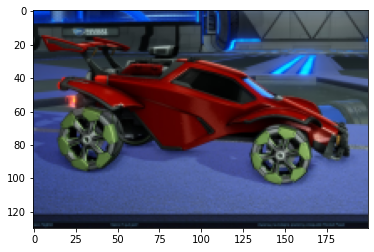

In [ ]:
plt.imshow(x_octane[9])

Scrab

In [ ]:
x_scrab, y_scrab = load_and_preprocess_images("dataset_train", "Scrab")

print(x_scrab.shape) 
print('how-many, HEIGHT, WIDTH, channels')
print(y_scrab.shape)
print(y_scrab[9])

(186, 130, 200, 3)
how-many, HEIGHT, WIDTH, channels
(186,)
Scrab


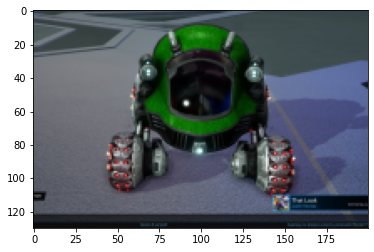

In [ ]:
plt.imshow(x_scrab[9])

Merc

In [ ]:
x_merc, y_merc = load_and_preprocess_images("dataset_train", "Merc")

print(x_merc.shape) 
print('how-many, HEIGHT, WIDTH, channels')
print(y_merc.shape)
print(y_merc[9])

(326, 130, 200, 3)
how-many, HEIGHT, WIDTH, channels
(326,)
Merc


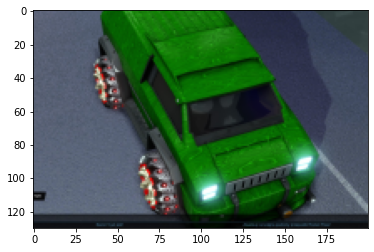

In [ ]:
plt.imshow(x_merc[9])

Aftershock

In [ ]:
x_aftershock, y_aftershock = load_and_preprocess_images("dataset_train", "Aftershock")

print(x_aftershock.shape) 
print('how-many, HEIGHT, WIDTH, channels')
print(y_aftershock.shape)
print(y_aftershock[9])

(319, 130, 200, 3)
how-many, HEIGHT, WIDTH, channels
(319,)
Aftershock


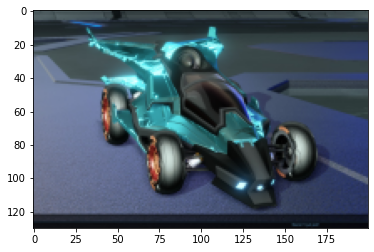

In [ ]:
plt.imshow(x_aftershock[9])

Breakout

In [ ]:
x_breakout, y_breakout = load_and_preprocess_images("dataset_train", "Breakout")
print(x_breakout.shape) 
print('how-many, HEIGHT, WIDTH, channels')
print(y_breakout.shape)
print(y_breakout[0])

(358, 130, 200, 3)
how-many, HEIGHT, WIDTH, channels
(358,)
Breakout


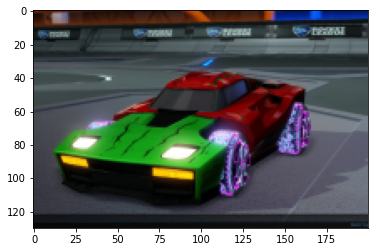

In [ ]:
plt.imshow(x_breakout[9])

#### Concatenate all together (images and labels)

In [ ]:
all_images = np.concatenate((x_octane, x_scrab, x_merc, x_aftershock, x_breakout))
all_labels = np.concatenate((y_octane, y_scrab, y_merc, y_aftershock, y_breakout))

print(all_images.shape)
print(all_labels.shape)

(1421, 130, 200, 3)
(1421,)


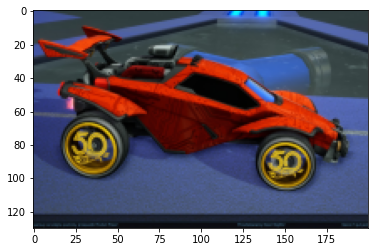

In [ ]:
plt.imshow(all_images[6]) # some random image from dataset, [6] will be one from Octane

#### Onehot labels

In [ ]:
all_labels_dp = pd.get_dummies(all_labels)
all_labels = pd.get_dummies(all_labels).to_numpy() # one-hot

In [ ]:
all_labels_dp

,Aftershock,Breakout,Merc,Octane,Scrab
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
1416,0,1,0,0,0
1417,0,1,0,0,0
1418,0,1,0,0,0
1419,0,1,0,0,0


In [ ]:
all_labels

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]], dtype=uint8)

#### Shuffle

In [ ]:
all_images, all_labels = shuffle(all_images, all_labels, random_state=42) # from sklearn.utils

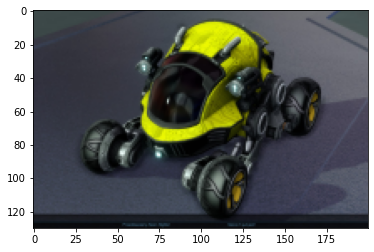

In [ ]:
plt.imshow(all_images[1])

In [ ]:
all_labels[1] # should be valid class coresponding to image above - Aftershock	Breakout	Merc	Octane	Scrab

array([0, 0, 0, 0, 1], dtype=uint8)

#### Data normalization

In [ ]:
all_images = all_images.astype('float32') / 255

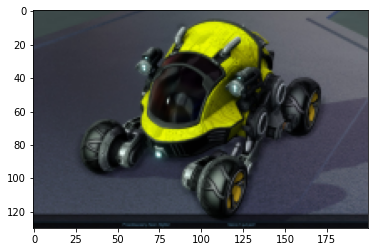

In [ ]:
plt.imshow(all_images[1]) # after changing, should be still plottin it corretly

In [ ]:
all_labels[1] # Aftershock	Breakout	Merc	Octane	Scrab
# class match with photo

array([0, 0, 0, 0, 1], dtype=uint8)

In [ ]:
print("all_images.shape: {}".format(all_images.shape))
print("all_labels.shape: {}".format(all_labels.shape))

all_images.shape: (1421, 130, 200, 3)
all_labels.shape: (1421, 5)


#### Load test data (same as above, but more 'packed')

In [ ]:
x_octane_test, y_octane_test = load_and_preprocess_images("dataset_test", "Octane")
x_scrab_test, y_scrab_test = load_and_preprocess_images("dataset_test", "Scrab")
x_merc_test, y_merc_test = load_and_preprocess_images("dataset_test", "Merc")
x_aftershock_test, y_aftershock_test = load_and_preprocess_images("dataset_test", "Aftershock")
x_breakout_test, y_breakout_test = load_and_preprocess_images("dataset_test", "Breakout")

In [ ]:
all_images_test = np.concatenate((x_octane_test, x_scrab_test, x_merc_test, x_aftershock_test, x_breakout_test))
all_labels_test = np.concatenate((y_octane_test, y_scrab_test, y_merc_test, y_aftershock_test, y_breakout_test))

In [ ]:
all_labels_dp_test = pd.get_dummies(all_labels_test)
all_labels_test = pd.get_dummies(all_labels_test).to_numpy() # one-hot

In [ ]:
all_images_test, all_labels_test = shuffle(all_images_test, all_labels_test, random_state=42) # from sklearn.utils

In [ ]:
all_images_test = all_images_test.astype('float32') / 255 # Data normalization

### Keras CNN

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import metrics
from tensorflow.keras import losses
from keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow import keras

In [ ]:
input_shape = all_images.shape[1:]
input_shape

(130, 200, 3)

In [ ]:
model = Sequential()
model.add(Conv2D(3, (3, 3), padding='valid', input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dense(5))
model.add(Activation('softmax'))

opt = RMSprop(learning_rate=0.01)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 128, 198, 3)       84        
                                                                 
 activation_9 (Activation)   (None, 128, 198, 3)       0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 64, 99, 3)        0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 19008)             0         
                                                                 
 dense_6 (Dense)             (None, 128)               2433152   
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                      

In [ ]:
class CustomCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f'\t Epoch {epoch + 1} finished')

    def on_train_end(self, logs=None):
        print('Training over!')

keras_callbacks   = [
      EarlyStopping(monitor='categorical_accuracy', patience=3, mode='max', min_delta=0.01),
      CustomCallback()
]

In [ ]:
model.compile(loss=losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(), #RMSprop(),
              metrics=[metrics.categorical_accuracy])

history = model.fit(all_images, all_labels,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    callbacks=keras_callbacks,
                    validation_data=(all_images_test, all_labels_test))

Epoch 1/10
12/12 [==============================] - 13s 1s/step - loss: 7.3333 - categorical_accuracy: 0.2336 - val_loss: 1.7095 - val_categorical_accuracy: 0.3923
Epoch 2/10
12/12 [==============================] - 12s 1s/step - loss: 1.6489 - categorical_accuracy: 0.5130 - val_loss: 1.2661 - val_categorical_accuracy: 0.4917
Epoch 3/10
12/12 [==============================] - 21s 2s/step - loss: 0.9367 - categorical_accuracy: 0.7094 - val_loss: 0.9346 - val_categorical_accuracy: 0.6796
Epoch 4/10
12/12 [==============================] - 19s 2s/step - loss: 0.6689 - categorical_accuracy: 0.7790 - val_loss: 0.7874 - val_categorical_accuracy: 0.6851
Epoch 5/10
12/12 [==============================] - 12s 998ms/step - loss: 0.4631 - categorical_accuracy: 0.8973 - val_loss: 0.6131 - val_categorical_accuracy: 0.8287
Epoch 6/10
12/12 [==============================] - 12s 1s/step - loss: 0.3500 - categorical_accuracy: 0.9409 - val_loss: 0.4426 - val_categorical_accuracy: 0.9503
Epoch 7/10
12

In [ ]:
score = model.evaluate(all_images_test, all_labels_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.27999189496040344
Test accuracy: 0.950276255607605


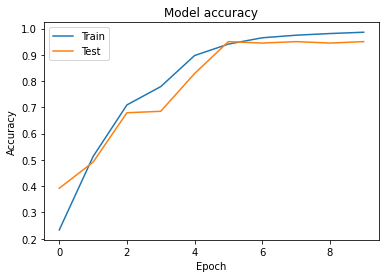

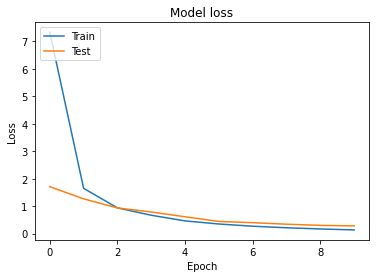

In [ ]:
# visualize training history 
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

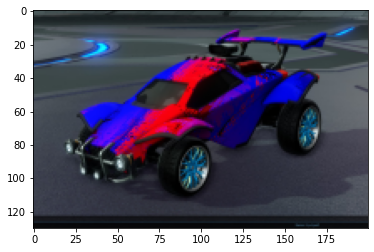

In [ ]:
plt.imshow(all_images_test[0])

In [ ]:
all_images_test[0:1].shape

(1, 130, 200, 3)

In [ ]:
all_labels_test[0]

array([0, 0, 0, 1, 0], dtype=uint8)

In [ ]:
model.predict(all_images_test[0:1])

array([[0.15390524, 0.03610497, 0.04533543, 0.7054977 , 0.05915669]],
      dtype=float32)

Onehot =  Aftershock	Breakout	Merc	Octane	Scrab

### Conclusions
- CNN correctly classifies 5 types of Rocket League cars
- the accuracy score is 98.56% on the training set and 95% on the test set
- in all_images_test there are photos of cars and their paints / decorations, which are NOT in all_images
- the model does the prediction of the test image given for input (0.7 is on the 4th position in the output, 1 in the labels in the same position, everything is correct) 